# First order equations have no exponent.

* 2D - Straight lines
    * y = mx + c
    * ax + by = c
* 3D - Flat surfaces
    * z = ax + by + k
    * ax + by + cz = k


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2D Systems of equations

Solve a system of equations using the np.linalg.solve function

* 1x + 2y = 1
* 3x + 5y = 2

in the form of a linear matrix equation ax = b, given a and b, solve for x.

In [7]:
# Using NumPy linalg.solve
# Computes the "exact" solution, x, of the well-determined, full rank, linear matrix equation ax = b.
# Solve the system of equations x0 + 2 * x1 = 1 and 3 * x0 + 5 * x1 = 2:
a = np.array([
    [1, 2], 
    [3, 5]
])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
print(x)

# Check that the solution is correct using the "allclose" function
# which checks if two arrays are element-wise equal within a tolerance.
# Compare the dot product of a and x with b:
print(np.allclose(np.dot(a, x), b))

[-1.  1.]
True


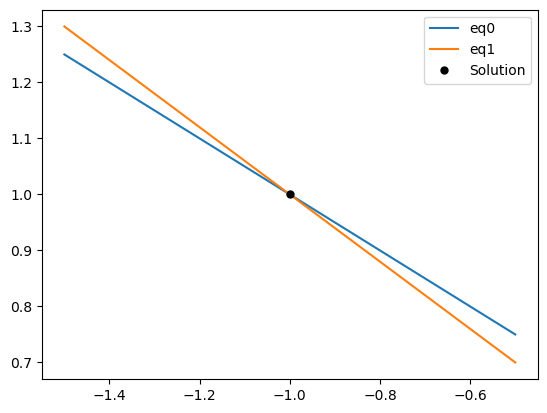

In [12]:
# Plot the lines and the solution
def eq0(x):
    return -1/2*x + 1/2

def eq1(x):
    return -3/5*x + 2/5

x_range = np.arange(-1.5, -0.25, 0.25)

plt.plot(x_range, eq0(x_range), label='eq0')
plt.plot(x_range, eq1(x_range), label='eq1')
plt.plot(*x, 'o', markersize=5, color='k', label='Solution')
plt.legend()
plt.show()


Solve a system of equations using the **np.linalg.lstsq** (least squares) function
which is used when there may not be an exact solution.

It returns residuals and the rank of the result x.

* 3x + 2y = 9
* 2x + 4y = 8

In [13]:
# Using NumPy linalg.lstsq
# Solve the system of linear equations:
# 3x + 2y = 9
# 2x + 4y = 8
a = np.array([[3, 2], [2, 4]])
b = np.array([9, 8])
x, res, rnk, s = np.linalg.lstsq(a, b, rcond=None)
print(x)
print(res)
print(rnk)

[2.5  0.75]
[]
2


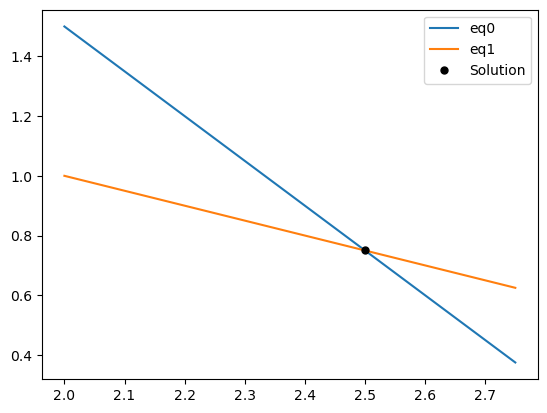

In [19]:
# Plot the lines and the solution
def eq0(x):
    return -3/2*x + 9/2

def eq1(x):
    return -2/4*x + 8/4

x_range = np.arange(2, 3, 0.25)

plt.plot(x_range, eq0(x_range), label='eq0')
plt.plot(x_range, eq1(x_range), label='eq1')
plt.plot(*x, 'o', markersize=5, color='k', label='Solution')
plt.legend()
plt.show()

### Try to fit a line through some noisy data using least squares

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999997 -0.9499999999999992


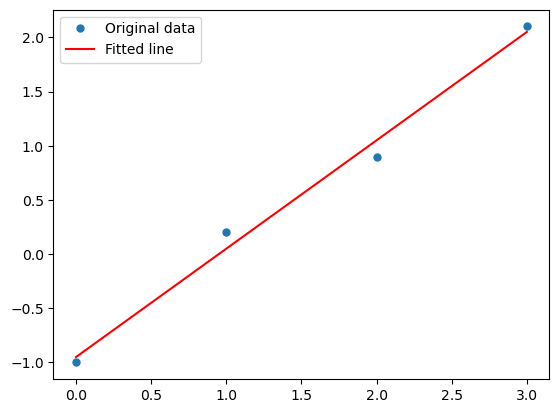

In [21]:
# Fit a line, y = mx + c, through some noisy data-points:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
# By examining the coefficients, we see that the line should have a gradient of roughly 1
# and cut the y-axis at, more or less, -1.
# We can rewrite the line equation as y = Ap, where A = [[x 1]] and p = [[m], [c]].
# Now use lstsq to solve for p:

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
# (1.0 -0.95) # may vary

# Plot the 2D data along with the fitted line:
plt.plot(x, y, 'o', label='Original data', markersize=5)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

### 3D Systems of Equations

Solve the following system of linear equations
using the linalg.solve function.

* eq0: 1x + 3y - 2z =  2, multiply eq0 by 2 =>  2x + 6y - 4z = 4, add (eq0 + eq1) => 4x + 7y = 3, => **y = -4/7x + 3/7**
* eq1: 2x + 1y + 4z = -1, multiply eq2 by 4 => 12x - 8y + 4z = 4, sub (eq2 - eq1) => 10x - 9y = 5, => **y = 10/9x - 5/9**
* eq2: 3x - 2y +  z =  1, multiply eq2 by 2 =>  6x - 4y + 2z = 2, add (eq2 + eq0) => 7x - 1y = 4, => **y = 7x - 4**

Solve for x in the form of the linear matrix equation ax = b.
Where a is a 3x3 matrix and x and b are 3x1 vectors.

          |1,  3, -2|      |x|      | 2|
    a =   |2,  1,  4|, x = |y|, b = |-1|
          |3, -2,  1|      |z|      | 1|


In [23]:
# Solve the following system of linear equations
# using the linalg.solve function.
# 1x + 3y -2z = 2
# 2x + 1y + 4z = -1
# 3x - 2y + z = 1
#
# Solve for x in the form of the linear matrix equation ax = b.
# Where a is a 3x3 matrix and x and b are 3x1 vectors.
#     |1,  3, -2|      |x|      | 2|
# a = |2,  1,  4|, x = |y|, b = |-1|
#     |3, -2,  1|      |z|      | 1|
#
a: np.array = np.array([
    [1,  3, -2],
    [2,  1,  4],
    [3, -2,  1]
])

b: np.array = np.array([
    2,
    -1,
    1
])

x = np.linalg.solve(a, b)
print(x)

exact_sol = np.array([31/53, 5/53, -30/53])
print(exact_sol)
print(np.allclose(x, exact_sol))

[ 0.58490566  0.09433962 -0.56603774]
[ 0.58490566  0.09433962 -0.56603774]
True


In [33]:
# Define the three equations for plotting the surfaces
# eq0: z =  1/2x + 3/2y - 1
# eq1: z = -1/2x - 1/4y - 1/4
# eq2: z =   -3x +   2y + 1
def eq0(x, y):
    return 1/2*x + 3/2*y - 1


def eq1(x, y):
    return -1/2*x - 1/4*y - 1/4


def eq2(x, y):
    return -3*x + 2*y + 1

In [34]:
# Define the 3 equations for the line intersections between each pair of surfaces
def eq0_1(x):
    return -4/7*x + 3/7

def eq1_2(x):
    return 10/9*x - 5/9

def eq2_0(x):
    return 7*x - 4

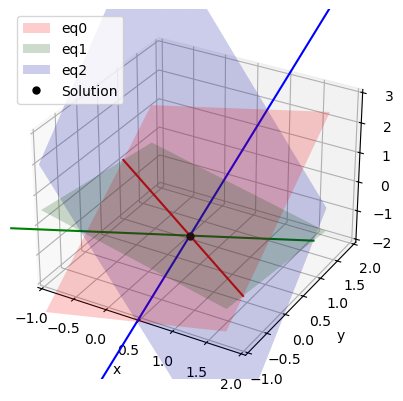

In [37]:
# Plot the three 3D surface equations along with a marker for the solution:
# Define the ranges for x and y
x_range = np.arange(-1, 2, 0.25)
y_range = np.arange(-1, 2, 0.25)
X, Y = np.meshgrid(x_range, y_range)

# Prepare 3D figure and label axes
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the surface equations
ax.plot_surface(X, Y, eq0(X, Y), color='r', alpha=0.2, label='eq0')
ax.plot_surface(X, Y, eq1(X, Y), color='g', alpha=0.2, label='eq1')
ax.plot_surface(X, Y, eq2(X, Y), color='b', alpha=0.2, label='eq2')

# Plot the line intersections
ax.plot(x_range, eq0_1(x_range), eq0(x_range, eq0_1(x_range)), color='r')
ax.plot(x_range, eq1_2(x_range), eq1(x_range, eq1_2(x_range)), color='g')
ax.plot(x_range, eq2_0(x_range), eq2(x_range, eq2_0(x_range)), color='b')

ax.set_ylim(-1, 2)
ax.set_xlim(-1, 2)
ax.set_zlim(-2, 3)

# Plot the solution
# ax.plot(x[0], x[1], x[2], 'o', markersize=2, color='k')
ax.plot(*x, 'o', markersize=5, color='k', label='Solution')
ax.legend()

plt.show()